In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear')
training_points = [[2,1], [4,7], [2,8], [7,1], [3,3], [0,9]]
labels = [1,2,6,4,4,2]
clf.fit(training_points, labels)
print(clf.predict([[4,2]]))

[4]


In [ ]:
clf.support_vectors_

array([[2., 1.],
       [4., 7.],
       [0., 9.],
       [3., 3.],
       [2., 8.]])

In [ ]:
import pandas as pd
wdata = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
wdata.isnull().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
wdata['Precip Type'].fillna(value='rain', inplace=True)
wdata['Precip Type'] = wdata['Precip Type'].map({'rain':0, 'snow':1})
wdata.isnull().sum()

<ipython-input-38-756f214d0ca6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wdata['Precip Type'].fillna(value='rain', inplace=True)


,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [ ]:
feature = wdata[['Temperature (C)', 'Humidity']]
target = wdata['Precip Type']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix

In [ ]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2)



ss = StandardScaler()
feature_train = ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)

In [ ]:
clf_kl = svm.SVC(kernel='linear', C=1.0)
clf_kl.fit(feature_train, target_train)
print(clf_kl.score(feature_train, target_train))
print(clf_kl.score(feature_test, target_test))
y_pred = clf_kl.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9939218786449289
0.9950754237727437
[[17097    95]
 [    0  2099]]


In [ ]:
clf_poly = svm.SVC(kernel='poly', C=1.0)
clf_poly.fit(feature_train, target_train)
print(clf_poly.score(feature_train, target_train))
print(clf_poly.score(feature_test, target_test))
y_pred = clf_poly.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9942069930794951
0.9952309367062361
[[17102    90]
 [    2  2097]]


In [ ]:
clf_rbf = svm.SVC(kernel='rbf', C=1.0)
clf_rbf.fit(feature_train, target_train)
print(clf_rbf.score(feature_train, target_train))
print(clf_rbf.score(feature_test, target_test))
y_pred = clf_rbf.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9932868510406677
0.9942460214607848
[[17093    99]
 [   12  2087]]


In [ ]:
clf_linenarSVC = svm.LinearSVC(C=1.0, max_iter=10000)
clf_linenarSVC.fit(feature_train, target_train)
print(clf_linenarSVC.score(feature_train, target_train))
print(clf_linenarSVC.score(feature_test, target_test))
y_pred = clf_linenarSVC.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9959824784220213
0.9967342283966617
[[17131    61]
 [    2  2097]]


In [ ]:
clf_NuSVC = svm.NuSVC(nu=0.2, kernel= 'rbf' , gamma=1)
clf_NuSVC.fit(feature_train, target_train)
print(clf_NuSVC.score(feature_train, target_train))
print(clf_NuSVC.score(feature_test, target_test))
y_pred = clf_NuSVC.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9686503719447397
0.9679643357005858
[[17192     0]
 [  618  1481]]


In [ ]:
import numpy as np
ex = np.array([[20, 0.8]])
print(clf_kl.predict(ex))
print(clf_poly.predict(ex))
print(clf_rbf.predict(ex))
print(clf_linenarSVC.predict(ex))
print(clf_NuSVC.predict(ex))

[0]
[0]
[0]
[0]
[0]


In [ ]:
#svr
import pandas as pd
wdata = pd.read_csv('/content/drive/MyDrive/weatherHistory.csv')
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
wdata = wdata[:10000]
feature = wdata[['Temperature (C)']]
target = wdata[['Humidity']]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2)
ss=StandardScaler()
feature_train = ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)

In [ ]:
reg_svr_linear = svm.SVR(kernel='linear', C=1.0)
reg_svr_linear.fit(feature_train, target_train)

reg_svr_poly = svm.SVR(kernel='poly', C=1.0)
reg_svr_poly.fit(feature_train, target_train)

reg_svr_rbf = svm.SVR(kernel='rbf', C=1.0)
reg_svr_rbf.fit(feature_train, target_train)

reg_linearSVR = svm.LinearSVR(C=1.0, max_iter=10000)
reg_linearSVR.fit(feature_train, target_train)

reg_NuSVR = svm.NuSVR(nu=0.2, kernel= 'rbf' , gamma=1)
reg_NuSVR.fit(feature_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

NuSVR(gamma=1, nu=0.2)

In [ ]:
wdata[8000:8001]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
8000,2006-10-08 08:00:00.000 +0200,Clear,rain,11.138889,11.138889,0.87,11.9945,295.0,8.4203,0.0,1020.78,Partly cloudy until night.


In [ ]:
print( reg_svr_linear.predict(ss.transform([[11.138889]])))
print( reg_svr_poly.predict(ss.transform([[11.138889]])))
print( reg_svr_rbf.predict(ss.transform([[11.138889]])))
print( reg_linearSVR.predict(ss.transform([[11.138889]])))
print( reg_NuSVR.predict(ss.transform([[11.138889]])))

[0.7549131]
[0.75916126]
[0.81786354]
[0.76264141]
[0.75944113]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


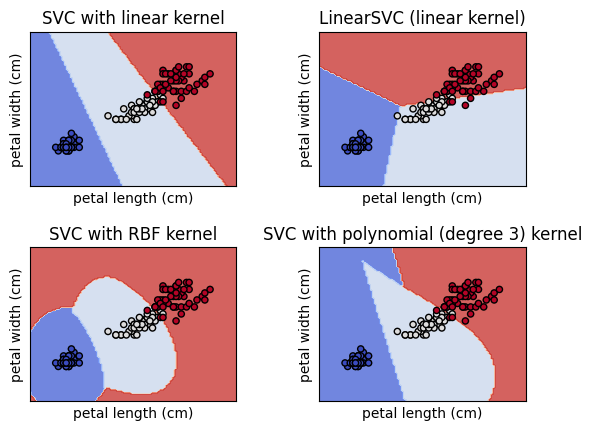

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, 2:4]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[2],
        ylabel=iris.feature_names[3],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()